In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-01 17:36:25,340 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-01 17:36:25,340 -INFO - common:common.py:609 - Module utils.common is loaded...
2021-06-01 17:36:25,340 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-01 17:36:25,356 -INFO - dataset_builder:dataset_builder.py:200 - dataset package is loaded...
2021-06-01 17:36:25,957 -INFO - dataset:dataset.py:652 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
decoder_dict

{0: 'button',
 1: 'link',
 2: 'iframe',
 3: 'textfield',
 4: 'dropdown',
 5: 'checkbox_btn',
 6: 'checkbox_label',
 7: 'radiobutton_btn',
 8: 'radiobutton_label',
 9: 'textarea',
 10: 'text',
 11: 'fileinput',
 12: 'image',
 13: 'colorpicker',
 14: 'range',
 15: 'progressbar',
 16: 'datetimeselector',
 17: 'numberselector',
 18: 'dropdownselector',
 19: 'checklist',
 20: 'table',
 21: 'n/a'}

# Generate dataset

2021-06-01 17:36:26,075 -WARNING - dataset_builder:dataset_builder.py:75 - The default dataset name "dummy" will be used
2021-06-01 17:36:26,076 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-06-01 17:36:26,077 -INFO - dataset_builder:dataset_builder.py:121 - Creating driver
2021-06-01 17:36:27,149 -INFO - dataset_builder:dataset_builder.py:129 - Chrome web driver is created
2021-06-01 17:36:27,149 -INFO - <ipython-input-6-539263dfd9ac>:<ipython-input-6-539263dfd9ac>:5 - getting page
2021-06-01 17:36:35,417 -INFO - common:common.py:75 - Window maximized
2021-06-01 17:36:35,417 -INFO - dataset_builder:dataset_builder.py:132 - save scrinshot: dataset/images/dummy.png
2021-06-01 17:36:35,468 -INFO - dataset_builder:dataset_builder.py:176 - Collect features using JS script
2021-06-01 17:36:35,792 -INFO - dataset_builder:dataset_builder.py:184 - Save html to dataset/html/dummy.html
2021-06-01 17:36:35,809 -INFO - dataset_builder:dataset_builder.p

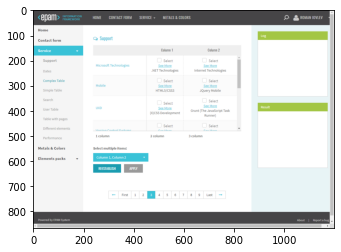

In [6]:
DATASET_NAME = 'dummy'
class JDIDatasetBuilder(DatasetBuilder):

    def setUp(self, driver):
        self.logger.info(f'getting page')
        driver.get(SITE_URL)
        
        driver.find_element_by_id("user-icon").click()
        driver.find_element_by_id("name").send_keys(LOGIN)
        driver.find_element_by_id("password").send_keys(PASSWORD)
        driver.find_element_by_id("login-button").click()
        sleep(WAIT_TIME_SECONDS)
        
        driver.find_element_by_link_text("Service").click()
        driver.find_element_by_link_text("Complex Table").click()
        maximize_window(driver=driver)
        

with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
    elements_df = builder.dataset
    plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))



In [7]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [8]:
df = build_features(df)

2021-06-01 17:36:36,258 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [9]:
elements_dict = build_elements_dict(df)

In [10]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

,tag_name,element_id,parent_id,upper_sibling,lower_sibling,displayed,is_hidden,x,y,width,height
0,HTML,7854887634581954845329426970,None,None,None,True,0,0.000000,0.0,1183.000000,850.0
1,HEAD,9617430825581954842304196677,7854887634581954845329426970,None,5702700988581954841090527425,False,0,0.000000,0.0,0.000000,0.0
2,META,9742890846581954842890240598,9617430825581954842304196677,None,7483701775581954842776233784,False,0,0.000000,0.0,0.000000,0.0
3,TITLE,7483701775581954842776233784,9617430825581954842304196677,9742890846581954842890240598,6693141850581954849261921650,False,0,0.000000,0.0,0.000000,0.0
4,META,6693141850581954849261921650,9617430825581954842304196677,7483701775581954842776233784,7357563944581954844048356073,False,0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
421,LI,3088531652581954840819301830,2629225658581954846290498451,0211631926581954844201544844,None,True,0,1115.890625,828.0,64.109375,15.0
422,A,8876821663581954848468597154,3088531652581954840819301830,None,None,True,0,1115.890625,828.0,64.109375,15.0
423,SCRIPT,9204164521581954842920381397,5702700988581954841090527425,2207420155581954841373750212,5481530638581954848459346434,False,1,0.000000,0.0,0.000000,0.0
424,SCRIPT,5481530638581954848459346434,5702700988581954841090527425,9204164521581954842920381397,3809905300581954841735817889,False,1,0.000000,0.0,0.000000,0.0


1200 867


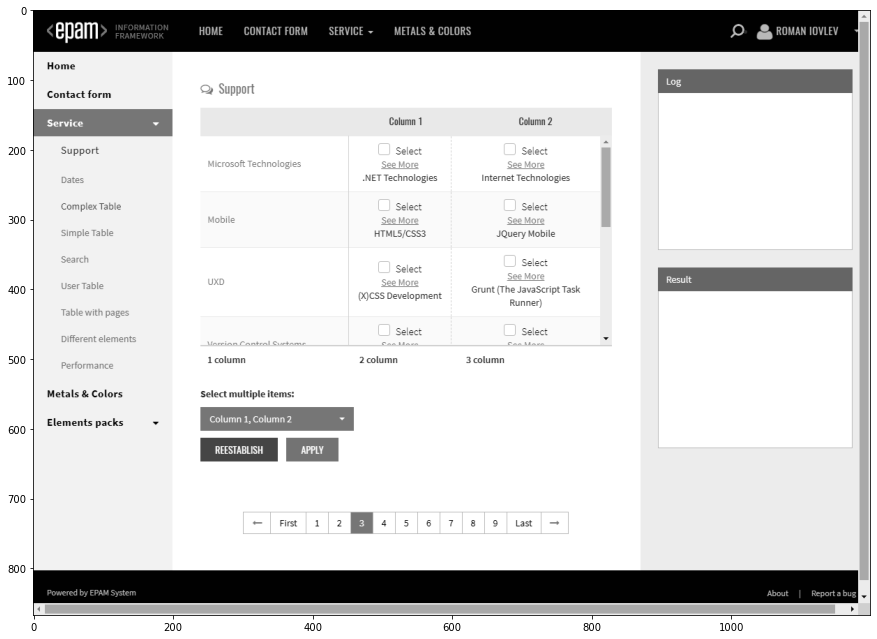

In [11]:
img = load_gray_image('dataset/images/dummy.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')

In [12]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
predictions_df

2021-06-01 17:36:36,954 -INFO - common:common.py:489 - Num radio buttons found: 0
2021-06-01 17:36:36,956 -INFO - common:common.py:493 - Num radio2 buttons found: 0
2021-06-01 17:36:36,957 -INFO - common:common.py:500 - Num checkboxes found: 16
2021-06-01 17:36:36,959 -INFO - common:common.py:507 - Num comboboxes/dropdowns found: 0
2021-06-01 17:36:36,962 -INFO - common:common.py:518 - Num textfields found: 2
2021-06-01 17:36:36,964 -INFO - common:common.py:523 - Num texfields for numbers found: 0
2021-06-01 17:36:36,967 -INFO - common:common.py:528 - Num ranges found: 0
2021-06-01 17:36:36,968 -INFO - common:common.py:533 - Num ordinary text inputs found: 0
2021-06-01 17:36:36,970 -INFO - common:common.py:536 - Num buttons found: 5
2021-06-01 17:36:36,972 -INFO - common:common.py:541 - Num buttons2 (Material-UI) found: 0
2021-06-01 17:36:36,974 -INFO - common:common.py:546 - Num links found: 71
(54, 8)


,element_id,x,y,width,height,displayed,is_hidden,label
211,6317098919581954840629330345,463.000000,191.0,126.000000,21.0,True,0,5
217,8245192741581954842027392703,610.000000,191.0,193.000000,21.0,True,0,5
226,5472202417581954840163838114,463.000000,271.0,126.000000,21.0,True,0,5
232,6654737785581954843172825408,610.000000,271.0,193.000000,21.0,True,0,5
241,4994807148581954843633405964,463.000000,360.0,126.000000,21.0,True,0,5
247,1924153970581954849949026967,610.000000,351.0,193.000000,21.0,True,0,5
256,0483555038581954845133711239,463.000000,450.0,126.000000,21.0,True,0,5
262,1143556003581954842303247401,610.000000,450.0,193.000000,21.0,True,0,5
340,4575603217581954846302338546,240.000000,569.0,220.000000,34.0,True,0,0
357,7518339950581954843879232057,240.000000,613.0,110.578125,34.0,True,0,0


In [13]:
plt.text?

1200 867


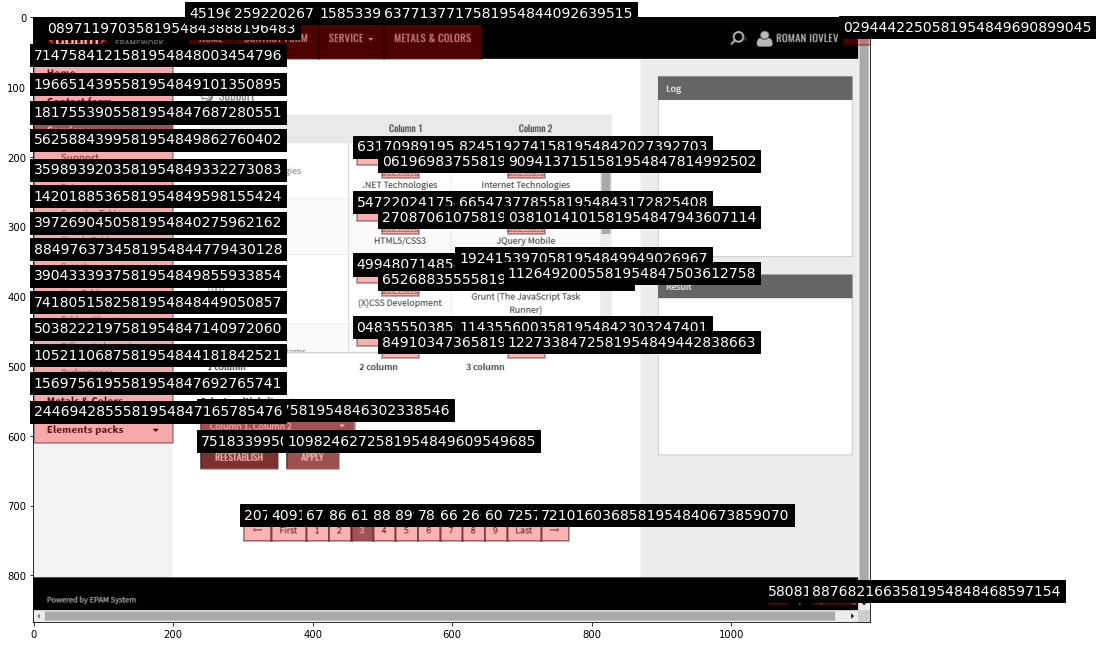

In [14]:
img = load_gray_image('dataset/images/dummy.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in predictions_df.iterrows():
    
    patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(r.x, r.y, r.element_id, fontsize = 14, color = 'white', backgroundcolor='black', alpha=1.)
    

In [15]:
df['class'] = df.attributes.apply(lambda x: x.get('class'))

In [16]:
df[df.tag_name == 'SPAN'][['element_id', 'parent_id', 'tag_name', 'displayed', 'is_hidden', 'class', 'x', 'y', 'width', 'height']]

,element_id,parent_id,tag_name,displayed,is_hidden,class,x,y,width,height
32,7409077713581954840505921064,9318047078581954849077933051,SPAN,False,1,fa fa-reorder,0.000000,0.00000,0.000000,0.0
35,1700581754581954849123575247,0897119703581954843888196483,SPAN,True,1,None,118.000000,19.00000,76.937500,24.0
45,3922687553581954849791691319,1585339233581954846143755825,SPAN,True,0,caret,479.859375,29.65625,8.000000,4.0
72,8123755816581954844924107667,2609725880581954843046970315,SPAN,True,1,None,1065.468750,20.00000,89.531250,20.0
73,2694785543581954847177594366,0294442250581954849690899045,SPAN,True,0,caret,1177.000000,28.15625,8.000000,4.0
85,6830512776581954848506685371,9499592290581954846630326603,SPAN,False,1,login-txt hidden,0.000000,0.00000,0.000000,0.0
88,9118656223581954843593869298,5197290117581954844507293923,SPAN,False,1,None,0.000000,0.00000,0.000000,0.0
92,2685890587581954841320291297,4755591705581954846987162389,SPAN,False,1,None,0.000000,0.00000,0.000000,0.0
94,9051758282581954842835354842,4425785635581954846529283484,SPAN,True,0,icon-search,1000.468750,20.00000,20.000000,20.0
96,6995537383581954848624055860,5560544885581954840385063456,SPAN,False,1,search-title,0.000000,0.00000,0.000000,0.0


In [17]:
df[df.attributes.apply(lambda x: x.get('onclick') is not None )][['element_id', 'parent_id', 'tag_name', 'displayed', 'is_hidden']]

,element_id,parent_id,tag_name,displayed,is_hidden
97,7967652846581954845347539930,5560544885581954840385063456,SPAN,False,1


In [18]:
COLS = ['element_id', 'parent_id', 'tag_name', 'displayed', 'is_hidden']

In [20]:
for el in df[df.tag_name == 'A'][COLS].element_id.values:
    describe_node(df=df, element_id=el)

,tag,box,d,h,element_id
0,A,"(20.0, 21.0, 86.0, 18.0)",True,0,0897119703581954843888196483
1,DIV,"(0.0, 0.0, 214.9375, 60.0)",True,0,4454755500581954849124366750
2,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
3,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
4,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
5,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
6,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(20.0, 21.0, 86.0, 18.0)",True,0,0897119703581954843888196483


,tag,box,d,h,element_id
0,A,"(222.9375, 0.0, 64.515625, 60.0)",True,0,4519698739581954842551182194
1,LI,"(222.9375, 0.0, 64.515625, 60.0)",True,0,8923950169581954845564553380
2,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
3,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
4,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
5,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
6,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
7,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(222.9375, 0.0, 64.515625, 60.0)",True,0,4519698739581954842551182194


,tag,box,d,h,element_id
0,A,"(287.453125, 0.0, 121.859375, 60.0)",True,0,2592202671581954843034893057
1,LI,"(287.453125, 0.0, 121.859375, 60.0)",True,0,6571734672581954848693009875
2,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
3,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
4,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
5,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
6,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
7,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(287.453125, 0.0, 121.859375, 60.0)",True,0,2592202671581954843034893057


,tag,box,d,h,element_id
0,A,"(409.3125, 0.0, 93.546875, 60.0)",True,0,1585339233581954846143755825
1,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
2,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
3,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
4,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
5,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
6,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
7,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(409.3125, 0.0, 93.546875, 60.0)",True,0,1585339233581954846143755825
1,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,NaN


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6933334705581954842868829918
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,0549302825581954840545669428
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6933334705581954842868829918


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,5478457981581954848687053400
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,9214289281581954847608635874
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,5478457981581954848687053400


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6499983752581954844638498722
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,3566466612581954844336440461
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6499983752581954844638498722


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6325005226581954848336903551
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,6950606560581954848819518268
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6325005226581954848336903551


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1144678569581954849177098936
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,6243206166581954844746676922
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1144678569581954849177098936


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,7309051831581954846751533329
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,1078702119581954846938109700
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,7309051831581954846751533329


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6292360542581954848443362609
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,6595394309581954845645251965
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,6292360542581954848443362609


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,2614014234581954841943365492
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,0114770511581954843226669469
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,2614014234581954841943365492


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1774833031581954849712489627
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,5159985978581954840175082700
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,1559043792581954846977140232
3,LI,"(409.3125, 0.0, 93.546875, 60.0)",True,0,6231699662581954843472704341
4,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
5,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
6,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
7,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
8,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
9,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1774833031581954849712489627


,tag,box,d,h,element_id
0,A,"(502.859375, 0.0, 140.484375, 60.0)",True,0,6377137717581954844092639515
1,LI,"(502.859375, 0.0, 140.484375, 60.0)",True,0,4159812627581954840634195221
2,UL,"(222.9375, 0.0, 420.40625, 60.0)",True,0,7801819079581954848487129420
3,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
4,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
5,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
6,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
7,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(502.859375, 0.0, 140.484375, 60.0)",True,0,6377137717581954844092639515


,tag,box,d,h,element_id
0,A,"(1160.0, 20.0, 40.0, 20.0)",True,0,0294442250581954849690899045
1,LI,"(1035.46875, 0.0, 164.53125, 60.0)",True,0,6438220643581954846755278864
2,UL,"(1035.46875, 0.0, 164.53125, 60.0)",True,0,8998573039581954846633640710
3,NAV,"(0.0, 0.0, 1200.0, 0.0)",False,1,8879396961581954845892807877
4,DIV,"(0.0, 0.0, 1200.0, 60.0)",True,0,0957095916581954849462061266
5,HEADER,"(0.0, 0.0, 1200.0, 60.0)",True,0,5220242811581954846334901137
6,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
7,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(1160.0, 20.0, 40.0, 20.0)",True,0,0294442250581954849690899045
1,DIV,"(0.0, 0.0, 0.0, 0.0)",False,1,NaN


,tag,box,d,h,element_id
0,A,"(0.0, 60.0, 200.0, 39.0)",True,0,7147584121581954848003454796
1,LI,"(0.0, 60.0, 200.0, 39.0)",True,0,5658760348581954840167685804
2,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
3,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
4,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
6,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
7,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769
8,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
9,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425


,tag,box,d,h,element_id
0,A,"(0.0, 60.0, 200.0, 39.0)",True,0,7147584121581954848003454796


,tag,box,d,h,element_id
0,A,"(0.0, 101.0, 200.0, 39.0)",True,0,1966514395581954849101350895
1,LI,"(0.0, 101.0, 200.0, 39.0)",True,0,2519184719581954846430180655
2,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
3,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
4,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
6,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
7,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769
8,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
9,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425


,tag,box,d,h,element_id
0,A,"(0.0, 101.0, 200.0, 39.0)",True,0,1966514395581954849101350895


,tag,box,d,h,element_id
0,A,"(0.0, 142.0, 200.0, 39.0)",True,0,1817553905581954847687280551
1,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
2,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
3,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
4,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
6,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
7,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769
8,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
9,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425


,tag,box,d,h,element_id
0,A,"(0.0, 142.0, 200.0, 39.0)",True,0,1817553905581954847687280551
1,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,NaN


,tag,box,d,h,element_id
0,A,"(0.0, 181.0, 200.0, 43.0)",True,0,5625884399581954849862760402
1,LI,"(0.0, 181.0, 200.0, 43.0)",True,0,0461480446581954844708497734
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 181.0, 200.0, 43.0)",True,0,5625884399581954849862760402


,tag,box,d,h,element_id
0,A,"(0.0, 224.0, 200.0, 38.0)",True,0,3598939203581954849332273083
1,LI,"(0.0, 224.0, 200.0, 38.0)",True,0,9828049751581954846355684475
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 224.0, 200.0, 38.0)",True,0,3598939203581954849332273083


,tag,box,d,h,element_id
0,A,"(0.0, 262.0, 200.0, 38.0)",True,0,1420188536581954849598155424
1,LI,"(0.0, 262.0, 200.0, 38.0)",True,0,8679561202581954845293012666
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 262.0, 200.0, 38.0)",True,0,1420188536581954849598155424


,tag,box,d,h,element_id
0,A,"(0.0, 300.0, 200.0, 38.0)",True,0,3972690450581954840275962162
1,LI,"(0.0, 300.0, 200.0, 38.0)",True,0,6021122457581954847090320715
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 300.0, 200.0, 38.0)",True,0,3972690450581954840275962162


,tag,box,d,h,element_id
0,A,"(0.0, 338.0, 200.0, 38.0)",True,0,8849763734581954844779430128
1,LI,"(0.0, 338.0, 200.0, 38.0)",True,0,0479581445581954840472823420
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 338.0, 200.0, 38.0)",True,0,8849763734581954844779430128


,tag,box,d,h,element_id
0,A,"(0.0, 376.0, 200.0, 38.0)",True,0,3904333937581954849855933854
1,LI,"(0.0, 376.0, 200.0, 38.0)",True,0,7592415452581954840679405808
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 376.0, 200.0, 38.0)",True,0,3904333937581954849855933854


,tag,box,d,h,element_id
0,A,"(0.0, 414.0, 200.0, 38.0)",True,0,7418051582581954848449050857
1,LI,"(0.0, 414.0, 200.0, 38.0)",True,0,9712311527581954849145086635
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 414.0, 200.0, 38.0)",True,0,7418051582581954848449050857


,tag,box,d,h,element_id
0,A,"(0.0, 452.0, 200.0, 38.0)",True,0,5038222197581954847140972060
1,LI,"(0.0, 452.0, 200.0, 38.0)",True,0,1472547574581954847466118660
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 452.0, 200.0, 38.0)",True,0,5038222197581954847140972060


,tag,box,d,h,element_id
0,A,"(0.0, 490.0, 200.0, 38.0)",True,0,1052110687581954844181842521
1,LI,"(0.0, 490.0, 200.0, 38.0)",True,0,7561083927581954846980970919
2,UL,"(0.0, 181.0, 200.0, 347.0)",True,0,5585488843581954843688685725
3,LI,"(0.0, 142.0, 200.0, 386.0)",True,0,1791893868581954847280804423
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 490.0, 200.0, 38.0)",True,0,1052110687581954844181842521


,tag,box,d,h,element_id
0,A,"(0.0, 530.0, 200.0, 39.0)",True,0,1569756195581954847692765741
1,LI,"(0.0, 530.0, 200.0, 39.0)",True,0,6682799823581954844494761112
2,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
3,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
4,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
6,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
7,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769
8,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
9,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425


,tag,box,d,h,element_id
0,A,"(0.0, 530.0, 200.0, 39.0)",True,0,1569756195581954847692765741


,tag,box,d,h,element_id
0,A,"(0.0, 571.0, 200.0, 39.0)",True,0,2446942855581954847165785476
1,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
2,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
3,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
4,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
6,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
7,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769
8,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
9,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425


,tag,box,d,h,element_id
0,A,"(0.0, 571.0, 200.0, 39.0)",True,0,2446942855581954847165785476
1,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,NaN


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,2848036635581954849554309900
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,7079615073581954847172738773
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,2848036635581954849554309900


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,0326580224581954840212935206
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,6373722420581954849464116294
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,0326580224581954840212935206


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1015744981581954844325062242
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,9030749955581954843474794554
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1015744981581954844325062242


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9335098777581954849154393109
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,0053959648581954845090542443
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9335098777581954849154393109


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9104969230581954844303423848
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,2246808997581954840831113872
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9104969230581954844303423848


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1882815223581954848295681186
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,9660258537581954841482058408
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,1882815223581954848295681186


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,8707549298581954845531945368
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,3381927801581954843021124049
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,8707549298581954845531945368


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9671934404581954842175368958
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,1592607285581954844944276828
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,2708380807581954843751537890
3,LI,"(0.0, 571.0, 200.0, 39.0)",True,0,3117743327581954840017510314
4,UL,"(0.0, 60.0, 200.0, 550.0)",True,0,2020476330581954845967914210
5,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,7079186885581954848849260071
6,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,8713438547581954842092758188
7,DIV,"(0.0, 60.0, 200.0, 560.0)",True,0,9864995797581954841422805870
8,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4460843940581954847929567908
9,DIV,"(0.0, 60.0, 200.0, 743.0)",True,0,4796958797581954840829592769


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9671934404581954842175368958


,tag,box,d,h,element_id
0,A,"(499.203125, 212.0, 53.59375, 18.0)",True,0,0619698375581954847343646003
1,TD,"(452.0, 180.0, 147.0, 80.0)",True,0,2254823307581954842467042149
2,TR,"(240.0, 180.0, 573.0, 80.0)",True,0,6501339595581954843659635071
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 191.0, 126.0, 21.0)",True,0,NaN
1,A,"(499.203125, 212.0, 53.59375, 18.0)",True,0,0619698375581954847343646003
2,P,"(463.0, 231.0, 126.0, 19.0)",True,0,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 212.0, 53.59375, 18.0)",True,0,9094137151581954847814992502
1,TD,"(599.0, 180.0, 214.0, 80.0)",True,0,5413698948581954846376825519
2,TR,"(240.0, 180.0, 573.0, 80.0)",True,0,6501339595581954843659635071
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 191.0, 193.0, 21.0)",True,0,NaN
1,A,"(679.703125, 212.0, 53.59375, 18.0)",True,0,9094137151581954847814992502
2,P,"(610.0, 231.0, 193.0, 19.0)",True,0,NaN


,tag,box,d,h,element_id
0,A,"(499.203125, 292.0, 53.59375, 18.0)",True,0,2708706107581954846177555398
1,TD,"(452.0, 260.0, 147.0, 80.0)",True,0,2581283496581954848398636502
2,TR,"(240.0, 260.0, 573.0, 80.0)",True,0,9596070051581954840079385507
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 271.0, 126.0, 21.0)",True,0,NaN
1,A,"(499.203125, 292.0, 53.59375, 18.0)",True,0,2708706107581954846177555398
2,P,"(463.0, 311.0, 126.0, 19.0)",True,0,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 292.0, 53.59375, 18.0)",True,0,0381014101581954847943607114
1,TD,"(599.0, 260.0, 214.0, 80.0)",True,0,1434255841581954841534444938
2,TR,"(240.0, 260.0, 573.0, 80.0)",True,0,9596070051581954840079385507
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 271.0, 193.0, 21.0)",True,0,NaN
1,A,"(679.703125, 292.0, 53.59375, 18.0)",True,0,0381014101581954847943607114
2,P,"(610.0, 311.0, 193.0, 19.0)",True,0,NaN


,tag,box,d,h,element_id
0,A,"(499.203125, 381.0, 53.59375, 18.0)",True,0,6526883555581954842804995484
1,TD,"(452.0, 340.0, 147.0, 99.0)",True,0,3897838641581954849673616428
2,TR,"(240.0, 340.0, 573.0, 99.0)",True,0,1458962740581954841597217010
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 360.0, 126.0, 21.0)",True,0,NaN
1,A,"(499.203125, 381.0, 53.59375, 18.0)",True,0,6526883555581954842804995484
2,P,"(463.0, 400.0, 126.0, 19.0)",True,0,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 372.0, 53.59375, 18.0)",True,0,1126492005581954847503612758
1,TD,"(599.0, 340.0, 214.0, 99.0)",True,0,0647453138581954844663945666
2,TR,"(240.0, 340.0, 573.0, 99.0)",True,0,1458962740581954841597217010
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 351.0, 193.0, 21.0)",True,0,NaN
1,A,"(679.703125, 372.0, 53.59375, 18.0)",True,0,1126492005581954847503612758
2,P,"(610.0, 391.0, 193.0, 38.0)",True,0,NaN


,tag,box,d,h,element_id
0,A,"(499.203125, 471.0, 53.59375, 18.0)",True,0,8491034736581954848896010885
1,TD,"(452.0, 439.0, 147.0, 80.0)",True,0,0215107515581954845741032948
2,TR,"(240.0, 439.0, 573.0, 80.0)",True,0,8990647841581954844091977899
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 450.0, 126.0, 21.0)",True,0,NaN
1,A,"(499.203125, 471.0, 53.59375, 18.0)",True,0,8491034736581954848896010885
2,P,"(463.0, 490.0, 126.0, 19.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 471.0, 53.59375, 18.0)",True,0,1227338472581954849442838663
1,TD,"(599.0, 439.0, 214.0, 80.0)",True,0,5096115994581954848241644696
2,TR,"(240.0, 439.0, 573.0, 80.0)",True,0,8990647841581954844091977899
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 450.0, 193.0, 21.0)",True,0,NaN
1,A,"(679.703125, 471.0, 53.59375, 18.0)",True,0,1227338472581954849442838663
2,P,"(610.0, 490.0, 193.0, 19.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(499.203125, 551.0, 53.59375, 18.0)",True,1,9995992544581954841175021983
1,TD,"(452.0, 519.0, 147.0, 99.0)",True,1,5885368047581954840149142540
2,TR,"(240.0, 519.0, 573.0, 99.0)",True,1,9287923842581954842588223827
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 530.0, 126.0, 21.0)",True,1,NaN
1,A,"(499.203125, 551.0, 53.59375, 18.0)",True,1,9995992544581954841175021983
2,P,"(463.0, 570.0, 126.0, 38.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 560.0, 53.59375, 18.0)",True,1,9857837343581954845053018587
1,TD,"(599.0, 519.0, 214.0, 99.0)",True,1,1413240516581954849649985474
2,TR,"(240.0, 519.0, 573.0, 99.0)",True,1,9287923842581954842588223827
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 539.0, 193.0, 21.0)",True,1,NaN
1,A,"(679.703125, 560.0, 53.59375, 18.0)",True,1,9857837343581954845053018587
2,P,"(610.0, 579.0, 193.0, 19.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(499.203125, 650.0, 53.59375, 18.0)",True,1,2289286134581954849101819492
1,TD,"(452.0, 618.0, 147.0, 99.0)",True,1,2201210142581954849224012667
2,TR,"(240.0, 618.0, 573.0, 99.0)",True,1,4034273787581954841916921686
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 629.0, 126.0, 21.0)",True,1,NaN
1,A,"(499.203125, 650.0, 53.59375, 18.0)",True,1,2289286134581954849101819492
2,P,"(463.0, 669.0, 126.0, 38.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 650.0, 53.59375, 18.0)",True,1,1522092564581954843858868817
1,TD,"(599.0, 618.0, 214.0, 99.0)",True,1,8755010173581954847883647867
2,TR,"(240.0, 618.0, 573.0, 99.0)",True,1,4034273787581954841916921686
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 629.0, 193.0, 21.0)",True,1,NaN
1,A,"(679.703125, 650.0, 53.59375, 18.0)",True,1,1522092564581954843858868817
2,P,"(610.0, 669.0, 193.0, 38.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(499.203125, 749.0, 53.59375, 18.0)",True,1,5737986023581954845966687454
1,TD,"(452.0, 717.0, 147.0, 80.0)",True,1,4709646914581954846566222217
2,TR,"(240.0, 717.0, 573.0, 80.0)",True,1,4786402666581954849062829759
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 728.0, 126.0, 21.0)",True,1,NaN
1,A,"(499.203125, 749.0, 53.59375, 18.0)",True,1,5737986023581954845966687454
2,P,"(463.0, 768.0, 126.0, 19.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 749.0, 53.59375, 18.0)",True,1,1018069868581954844019953593
1,TD,"(599.0, 717.0, 214.0, 80.0)",True,1,1899721703581954848738927932
2,TR,"(240.0, 717.0, 573.0, 80.0)",True,1,4786402666581954849062829759
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 728.0, 193.0, 21.0)",True,1,NaN
1,A,"(679.703125, 749.0, 53.59375, 18.0)",True,1,1018069868581954844019953593
2,P,"(610.0, 768.0, 193.0, 19.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(499.203125, 829.0, 53.59375, 18.0)",True,1,7627636922581954844409212705
1,TD,"(452.0, 797.0, 147.0, 80.0)",True,1,1172468071581954846340028479
2,TR,"(240.0, 797.0, 573.0, 80.0)",True,1,4750174715581954846922692268
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(463.0, 808.0, 126.0, 21.0)",True,1,NaN
1,A,"(499.203125, 829.0, 53.59375, 18.0)",True,1,7627636922581954844409212705
2,P,"(463.0, 848.0, 126.0, 19.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(679.703125, 829.0, 53.59375, 18.0)",True,1,0747606389581954848099622242
1,TD,"(599.0, 797.0, 214.0, 80.0)",True,1,8673961555581954842544804510
2,TR,"(240.0, 797.0, 573.0, 80.0)",True,1,4750174715581954846922692268
3,TBODY,"(240.0, 180.0, 573.0, 697.0)",True,0,8359187123581954846118362331
4,TABLE,"(240.0, 180.0, 573.0, 697.0)",True,0,6591741243581954840958548942
5,DIV,"(240.0, 180.0, 590.0, 300.0)",True,0,4363727216581954845712398184
6,TD,"(240.0, 179.0, 590.0, 302.0)",True,0,8091562514581954840809608220
7,TR,"(240.0, 179.0, 590.0, 302.0)",True,0,0916907627581954842617144669
8,TBODY,"(240.0, 179.0, 590.0, 302.0)",True,0,5524533656581954842805870176
9,TABLE,"(240.0, 140.0, 590.0, 381.0)",True,0,0737570532581954841891502473


,tag,box,d,h,element_id
0,P,"(610.0, 808.0, 193.0, 21.0)",True,1,NaN
1,A,"(679.703125, 829.0, 53.59375, 18.0)",True,1,0747606389581954848099622242
2,P,"(610.0, 848.0, 193.0, 19.0)",True,1,NaN


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,4907109091581954841179972592
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,6712897152581954846369741216
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,8274018143581954842446115336
3,DIV,"(0.0, 0.0, 0.0, 0.0)",False,1,0020074751581954846635278608
4,DIV,"(240.0, 569.0, 220.0, 34.0)",True,0,3006844470581954840828999248
5,DIV,"(240.0, 569.0, 590.6875, 44.0)",True,0,8396069426581954840523029997
6,DIV,"(240.0, 541.0, 590.6875, 106.0)",True,0,4858421542581954842784344703
7,DIV,"(240.0, 100.0, 590.6875, 599.0)",True,0,9933601219581954843656715091
8,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
9,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,4907109091581954841179972592


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9573293526581954842905540533
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,9308438414581954846952388503
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,8274018143581954842446115336
3,DIV,"(0.0, 0.0, 0.0, 0.0)",False,1,0020074751581954846635278608
4,DIV,"(240.0, 569.0, 220.0, 34.0)",True,0,3006844470581954840828999248
5,DIV,"(240.0, 569.0, 590.6875, 44.0)",True,0,8396069426581954840523029997
6,DIV,"(240.0, 541.0, 590.6875, 106.0)",True,0,4858421542581954842784344703
7,DIV,"(240.0, 100.0, 590.6875, 599.0)",True,0,9933601219581954843656715091
8,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
9,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,9573293526581954842905540533


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,2153601428581954846224931563
1,LI,"(0.0, 0.0, 0.0, 0.0)",False,1,3601577689581954847278881161
2,UL,"(0.0, 0.0, 0.0, 0.0)",False,1,8274018143581954842446115336
3,DIV,"(0.0, 0.0, 0.0, 0.0)",False,1,0020074751581954846635278608
4,DIV,"(240.0, 569.0, 220.0, 34.0)",True,0,3006844470581954840828999248
5,DIV,"(240.0, 569.0, 590.6875, 44.0)",True,0,8396069426581954840523029997
6,DIV,"(240.0, 541.0, 590.6875, 106.0)",True,0,4858421542581954842784344703
7,DIV,"(240.0, 100.0, 590.6875, 599.0)",True,0,9933601219581954843656715091
8,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
9,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692


,tag,box,d,h,element_id
0,A,"(0.0, 0.0, 0.0, 0.0)",False,1,2153601428581954846224931563


,tag,box,d,h,element_id
0,A,"(301.34375, 719.0, 40.0, 32.0)",True,0,2071968614581954843340399269
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,4167139611581954843768523615
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(301.34375, 719.0, 40.0, 32.0)",True,0,2071968614581954843340399269


,tag,box,d,h,element_id
0,A,"(340.34375, 719.0, 51.484375, 32.0)",True,0,4091383774581954840107092045
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,1419214521581954842331836673
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(340.34375, 719.0, 51.484375, 32.0)",True,0,4091383774581954840107092045


,tag,box,d,h,element_id
0,A,"(390.828125, 719.0, 32.96875, 32.0)",True,0,6787228957581954842882377012
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,0620235679581954849461294409
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(390.828125, 719.0, 32.96875, 32.0)",True,0,6787228957581954842882377012


,tag,box,d,h,element_id
0,A,"(422.796875, 719.0, 32.96875, 32.0)",True,0,8646006135581954847942512631
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,1685555946581954844137064269
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(422.796875, 719.0, 32.96875, 32.0)",True,0,8646006135581954847942512631


,tag,box,d,h,element_id
0,A,"(454.765625, 719.0, 32.96875, 32.0)",True,0,6193795037581954848457443713
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,9808397205581954847259278938
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(454.765625, 719.0, 32.96875, 32.0)",True,0,6193795037581954848457443713


,tag,box,d,h,element_id
0,A,"(486.734375, 719.0, 32.96875, 32.0)",True,0,8848896666581954841879166333
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,2509261398581954841711787820
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(486.734375, 719.0, 32.96875, 32.0)",True,0,8848896666581954841879166333


,tag,box,d,h,element_id
0,A,"(518.703125, 719.0, 32.96875, 32.0)",True,0,8990530969581954842357722601
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,1772181986581954847932241961
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(518.703125, 719.0, 32.96875, 32.0)",True,0,8990530969581954842357722601


,tag,box,d,h,element_id
0,A,"(550.671875, 719.0, 32.96875, 32.0)",True,0,7821540007581954840918976684
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,8649680647581954843574765598
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(550.671875, 719.0, 32.96875, 32.0)",True,0,7821540007581954840918976684


,tag,box,d,h,element_id
0,A,"(582.640625, 719.0, 32.96875, 32.0)",True,0,6678117415581954845404994741
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,3398031635581954840892762353
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(582.640625, 719.0, 32.96875, 32.0)",True,0,6678117415581954845404994741


,tag,box,d,h,element_id
0,A,"(614.609375, 719.0, 32.96875, 32.0)",True,0,2661629520581954845916567246
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,4113880740581954845241901153
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(614.609375, 719.0, 32.96875, 32.0)",True,0,2661629520581954845916567246


,tag,box,d,h,element_id
0,A,"(646.578125, 719.0, 32.96875, 32.0)",True,0,6057179724581954841120250711
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,8350793153581954849370251508
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(646.578125, 719.0, 32.96875, 32.0)",True,0,6057179724581954841120250711


,tag,box,d,h,element_id
0,A,"(678.546875, 719.0, 50.1875, 32.0)",True,0,7257549090581954845428343472
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,8701451241581954847479804895
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(678.546875, 719.0, 50.1875, 32.0)",True,0,7257549090581954845428343472


,tag,box,d,h,element_id
0,A,"(727.734375, 719.0, 40.0, 32.0)",True,0,7210160368581954840673859070
1,LI,"(767.734375, 719.0, 0.0, 0.0)",False,1,0042978758581954843618526269
2,UL,"(302.34375, 719.0, 466.0, 32.0)",True,0,8013104383581954847144693796
3,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,2069997857581954843191286786
4,MAIN,"(200.0, 60.0, 670.6875, 743.0)",True,0,3893243870581954844971829692
5,DIV,"(200.0, 60.0, 670.6875, 743.0)",True,0,8663876869581954840805000446
6,DIV,"(0.0, 60.0, 1200.0, 743.0)",True,0,4931551359581954847081653334
7,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
8,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(727.734375, 719.0, 40.0, 32.0)",True,0,7210160368581954840673859070


,tag,box,d,h,element_id
0,A,"(1052.71875, 828.0, 30.265625, 15.0)",True,0,5808152519581954841714502494
1,LI,"(1052.71875, 828.0, 30.265625, 15.0)",True,0,7375498258581954843143210772
2,UL,"(1037.71875, 828.0, 142.28125, 15.0)",True,0,2629225658581954846290498451
3,DIV,"(0.0, 803.0, 1200.0, 64.0)",True,0,3271593997581954847246528444
4,DIV,"(0.0, 803.0, 1200.0, 64.0)",True,0,8669730156581954844823742535
5,FOOTER,"(0.0, 803.0, 1200.0, 64.0)",True,0,2207420155581954841373750212
6,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
7,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(1052.71875, 828.0, 30.265625, 15.0)",True,0,5808152519581954841714502494


,tag,box,d,h,element_id
0,A,"(1115.890625, 828.0, 64.109375, 15.0)",True,0,8876821663581954848468597154
1,LI,"(1115.890625, 828.0, 64.109375, 15.0)",True,0,3088531652581954840819301830
2,UL,"(1037.71875, 828.0, 142.28125, 15.0)",True,0,2629225658581954846290498451
3,DIV,"(0.0, 803.0, 1200.0, 64.0)",True,0,3271593997581954847246528444
4,DIV,"(0.0, 803.0, 1200.0, 64.0)",True,0,8669730156581954844823742535
5,FOOTER,"(0.0, 803.0, 1200.0, 64.0)",True,0,2207420155581954841373750212
6,BODY,"(0.0, 0.0, 1200.0, 867.0)",True,0,5702700988581954841090527425
7,HTML,"(0.0, 0.0, 1183.0, 850.0)",True,0,7854887634581954845329426970


,tag,box,d,h,element_id
0,A,"(1115.890625, 828.0, 64.109375, 15.0)",True,0,8876821663581954848468597154
